# エンタングルメントの可視化

In [1]:
from hello_qiskit import run_puzzle

以下の練習問題では、2つの量子ビットの状態を可視化する方法を紹介し、使用します。これを用いて、有名な実験の自分なりのバージョンをセットアップすることができます。つまり、ベルの不等式を通して量子力学の一意性を証明することです。

## 量子ビットを知ろう

### 練習問題1: 量子ビットを反転させる

まず始めに、1つの量子ビットから始めます。次のコードセルを実行して、量子ビットをどのように可視化するかを見てみましょう。

In [2]:
puzzle = run_puzzle(0)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

ここでは、異なる測定結果に対する確率を表す2本の線が見えます。縦線は標準的な測定（「z測定」とも呼ばれる）を表し、横線は前の節で議論した「x測定」を表しています。どちらの場合も、紫色の棒の長さが、結果`1`を得る確率を表しています。

上の状態では、縦線に紫の棒がないのがわかります。これは、z測定で`1`が得られる確率がゼロであることを表しています。横線では、紫の棒が線の半分を占めているので、x測定で`1`が得られる確率は $1/2$ です。この情報をもとに、ここでどの状態を表しているのかを特定することができます。この結果は、前節で見た状態 $|0\rangle$ と全く同じです。

状態 $|1\rangle$ がどのようなものかを見るには、`x`ゲートを適用することができます。これを行うには表示された図の下にあるボタンを使ってください。まず`x`ゲートを選択し、次にそれを適用する量子ビット`q[0]`を選択し、最後に「Apply operation」を押す必要があります。

これを3回繰り返して、状態 $|0\rangle$ と状態 $|1\rangle$ を反転してみましょう。

### 練習問題2: 軸の入れ替え

下図に示す状態は、z測定ではランダムな結果が得られますが、x測定では確実に`0`が出力されます。したがって、これは $|+\rangle$ であることがわかります。

状態 $|0\rangle$ と状態 $|+\rangle$ には強い類似性があることに気がつくかもしれません。具体的には、z測定をするときに一方の状態に対して正しいことは、x測定をするときに他方の状態に対して正しいということです。また、状態 $|1\rangle$ と状態 $|-\rangle$ も同じ関係にあります。

これを踏まえて、$H$ ゲートの効果について考えてみましょう。

$$H |0\rangle = |+\rangle, \quad H |1\rangle = |-\rangle\\H |+\rangle = |0\rangle, \quad H |-\rangle = |1\rangle.$$

これにより、$|0\rangle$ 状態が $|+\rangle$ 状態に、またその逆になり、$|1\rangle$ 状態が $|-\rangle$ 状態に、またはその逆になります。事実上、z 測定と x 測定の役割が逆になります。これにより、この視覚化では単純な効果が得られます。つまり、2 つの線が入れ替わります。

以下のセルを実行し、`h`ゲートを3回適用して、この動作を確認してください。

In [3]:
puzzle = run_puzzle(1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

### 練習問題3: 回転

では、ブロッホ球のy軸まわりの回転を、ゲート`ry(pi/4)`を使って試してみましょう。これを4つ適用して、何が起こるか見てみましょう。

In [4]:
puzzle = run_puzzle(2)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

こちらの効果は、アダマールのようにわかりやすいものではありません。しかし、もっと直感的に理解できる方法があるのです。お互いの上端に2本の線を引き、それらの基準位置が交差する点を配置すればいいのです。

これはブロッホ球と呼ばれる概念に関連しているので、これを実現するために「Bloch」というコマンドを使用します。下にある`ry`ゲートと同様に試してみてください。ゲートが効果的に点を回転させ、それに応じて線上のバーが変化するのがわかるはずです。

In [5]:
puzzle = run_puzzle(3)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

先に進む前に、 `puzzle.get_circuit()`メソッドを使用して、作成している回路の Qiskit 回路オブジェクトを取得できることに留意してください。これは、パズルの初期状態を準備するために使用されるゲートを含む回路全体に対して行うことができます。

In [6]:
puzzle.get_circuit(use_initializer=True).draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     └───┘└───┘
q_1: ──────────
               
b: 2/══════════

または、自分の手によって追加したゲートだけの回路も取得できます。

In [7]:
puzzle.get_circuit().draw()

q_0: 
     
q_1: 
     
b: 2/

### 練習問題4: 第2の量子ビット

グリッドの大部分はこれまで空でした。いくつかのスペースは左側にある2番目の量子ビットのために確保されています。ここでもz測定確率を表す縦線とx測定確率を表す横線が表示されています。

この新しい量子ビットに慣れるために、`x`, `h`, `ry(pi/4)`をそれぞれ2回ずつ使ってみてください。「Bloch」コマンドを使うこともできます。

In [8]:
puzzle = run_puzzle(4)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

### 練習問題5: 2つの量子ビットを同時に使う

2つの量子ビットを同時に可視化するために、追跡する必要がある情報がさらに多くあります。このため、4つの新しい線を追加します。

これらの新しい線のうち、一番下の線は $p(|01\rangle)+p(|10\rangle)$ を表します。これは、量子ビットが両方のz測定で異なる結果を与える確率です。以下の初期状態が $|01\rangle$ であるので、この新しい線は紫色で、それらが確実に一致しないことを表します。

上部の新しい線は同じことを表しますが、両方の量子ビットのx測定を表します。x測定の結果は $|01\rangle$ 状態で完全にランダムなので、それらが一致するかしないかもランダムです。そのため、この線は以下の初期状態で半分埋まっています。

それぞれの量子ビットのx測定が同じ結果になるようにゲートを適用し、これが上部の線にどう影響するかを見てみましょう。

In [9]:
puzzle = run_puzzle(5)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

他の2つの新しい線も結果が異なる確率を表しますが、1つの量子ビットのx測定ともう1つの量子ビットのz測定の2つのケースに対するものです。

このことを念頭に置いて、`x`ゲートと`h`ゲートがこれらの新しい線にどのような影響を与えるかを予測することができます。例えば、`x`ゲートはある量子ビットのz測定の結果を反転させることを覚えておいてください。もしその結果が他の量子ビットの結果と一致するなら、`x`を適用することによって一致しなくなり、その逆もまた同様です。したがって、グリッドの1行に沿ったすべての線に影響を及ぼします。

以下で3つの`x`ゲートを使って、この動作を試してみてください。

In [10]:
puzzle = run_puzzle(6)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

前に見たように、`h`の効果は、`h`の前のz測定で正しいものは、後のx測定にも適用されるようにするものです。逆も同様です。このため、グリッド上の行全体を入れ替えるような効果があります。

これを見るために、以下の3つの`h`ゲートを試してみてください。

In [11]:
puzzle = run_puzzle(7)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

この行の組み合わせは、「Bloch」コマンドを使用すると、さらに明白になります。行を組み合わせるということは、3つの異なるペアの線が重ね合わせられ、`ry`ゲートがそれぞれに対して回転をもたらすということです。

これを見るには、`ry`回転を使って、両方の量子ビットを状態 $|1\rangle$ に回転させます。回転を実行するとき、それぞれの量子ビットに「Bloch」コマンドを使用してみてください。

In [12]:
puzzle = run_puzzle(8)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

### 練習問題6: 量子ビットをエンタングルさせる

新しい線は相関を表すので、エンタングルした状態を記述する上で非常に重要になります。

この視覚化を使って最も理解しやすいゲートは`cz`です。これは対称的に作用するので、どちらの量子ビットに作用させるか選択する必要はありません。両方の量子ビットに作用するだけです。

`h`ゲートが（列から列へ）線の位置を入れ替えることで理解できるように、`cz`ゲートも同じような説明を使うことができます。具体的には、各量子ビットのx測定線を、相関を表す隣の線と入れ替えるのです。

以下、3つの`cz`ゲートで試してみてください。

In [13]:
puzzle = run_puzzle(9)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

また、上部の線も変化したことにお気づきでしょうか。これを説明するためには、これまで欠けていたものを取り入れるために可視化を拡張する必要があります。また、「y測定」という概念もあり、量子ビットの状態を完全に記述するためには、これらの可能な結果を表す線を追加する必要があります。

In [14]:
puzzle = run_puzzle(10)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

ここでは、2つの新しい行と多くの新しい線を挿入して、y測定の結果と、y測定の結果を含むすべての相関を表現しています。

注目すべきは真ん中の線で、両方の量子ビットがy基底で測定されたときに異なる結果を得る確率を記述しています。この線は`cz`を実行したときに上部の線と入れ替わる線です。これを実際に見るために、もう3つの`cz`ゲートを実行してみてください。

これらの新しい線は「Bloch」コマンドに取り入れることもできることに注意してください。そのためには、円ではなく球を作成し、`rx`と`rz`のゲートも回転であることを見ることができるでしょう。これを私たちの可視化には含めませんが、次のコマンドを使えばいつでもこれらの球を作図することができます。

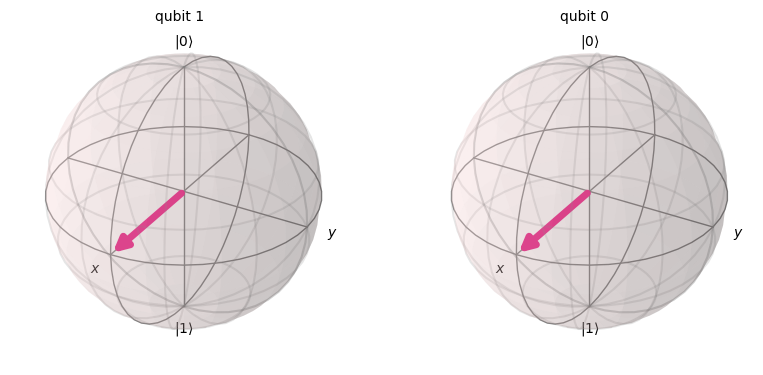

In [15]:
puzzle.plot_spheres()

### 練習問題7: サンドボックス

y測定に関するすべての情報を記録しておくと、グリッドが少し複雑になりすぎてしまいます。そこで、無視した状態に戻しましょう。

さて、これで実験の準備に必要なことはすべてわかったと思います。次に進む前に、自由に遊んでみてください。

In [16]:
puzzle = run_puzzle(11)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

## ベルの不等式

### 2.1 古典変数に対するベルテスト

ここで、量子ビットに基づく量子変数と、ビットに基づく標準的な変数とがどのように異なるかを調べます。

これを行うには、`A`と`B`と呼ぶ2つの変数を作成します。この変数が何になるのか、どのように初期化されるのかについては、何も条件を付けません。ですから、いろいろな可能性があります。

- それらはどのような種類の変数でもかまいません。次のようなものが考えられます。
    - 整数
    - リスト
    - 辞書
    - ...
- それらはあらゆる種類のプロセスで初期化される可能性があります。次のようなものが考えられます。
    - 空のまま
    - 与えられた値の集合で満たされる
    - 与えられたランダムなプロセスで生成され
        - そのプロセスは`A`と`B`に独立して適用される
        - そのプロセスは`A`と`B`に同時に適用され、両者のランダム性に相関を持たせる

変数がランダムな処理で初期化されるということは、プログラムを実行するたびに異なる値を持つということです。これは全く問題ありません。ただ一つ守らなければならないのは、ランダム性の生成過程が毎回同じであることです。

これらの変数を設定するために、以下の関数を使用することにします。現在、この関数では`A`と`B`を部分的に相関のあるランダムな浮動小数点数として定義しています。しかし、これは好きなように変更することができます。

In [17]:
import random
def setup_variables():
    
    ### この部分を好きなものに置き換えよ ###
    
    r = random.random()
    
    A = r*(2/3)
    B = r*(1/3)
    
    ### セクションの終わり ###
    
    return A, B

次の仕事は、ハッシュ関数を定義することです。これは単純に変数の一つを入力として受け取り、ビット値を出力として与える必要があります。

また、この関数は2種類のハッシュを実行できる必要があります。つまり、2つの異なる方法で変数を咀嚼してビットを吐き出すことができる必要があるのです。したがって、どのような種類のハッシュを使いたいかを関数に指示する必要もあります。

プログラムの他の部分と矛盾しないように、2つの可能なハッシュ型は`'H'`および`'V'`と呼ばれるべきです。また、出力は単一値のビット列である必要があります。つまり、`'0'`または`'1'`のどちらかです。

この（かなり任意の）例では、`A`と`B`をある値と比較することでビットを生成しています。出力は、両者がその値を下回っていれば`'1'`で、そうでなければ`'0'`です。ハッシュの種類によって、使用される値が決まります。

In [18]:
def hash2bit(variable, hash_type):
    
    ### この部分を好きなものに置き換えよ ###
    
    if hash_type == 'V':
        bit = (variable < 0.5)
    elif hash_type == 'H':
        bit = (variable < 0.25)
        
    bit = str(int(bit)) # Turn True or False into '1' and '0'
    
    ### セクションの終わり ###
        
    return bit

これらを定義した上で、計算したい量が4つあります。`P['HH']`, `P['HV']`, `P['VH']`, `P['VV']`です。

例として`P['HV']`に着目してみましょう。これは、`A`上の`'H'`型のハッシュから得られるビット値が、`B`上の`'V'`型のハッシュからのものと異なる確率を示すものです。この確率は、何度もサンプリングして、対応するビット値が一致しないサンプルの割合を求めることで推定します。

その他の確率も同様に定義されます。`P['HH']`は`A`と`B`の両方で`'H'`型のハッシュを比較し、`P['VV']`は`V`型のハッシュを比較し、`P['VH']`は`A`の`V`型のハッシュと`B`の`H`型のハッシュを比較します。

これらの確率は以下の関数で計算され `P`のすべての値を辞書に格納して返します。パラメーター`shots`は、使用するサンプルの数です。

In [19]:
shots = 8192
def calculate_P():
    P = {}
    for hashes in ['VV','VH','HV','HH']:
        
        # 各P[hash]を`shots`サンプルからサンプリングして計算する
        P[hashes] = 0
        for shot in range(shots):

            A, B = setup_variables()

            # 変数`A`のハッシュ型は`hashes`の1文字目である
            a = hash2bit(A, hashes[0])
            # 変数`B`のハッシュ型は`hashes`の2文字目である
            b = hash2bit(B, hashes[1])

            P[hashes] += (a != b)/shots
 
    return P

では、実際に設定した方法でこれらの値を計算し、変数をハッシュ化してみましょう。

In [20]:
P = calculate_P()
print(P)

{'VV': 0.2401123046875, 'VH': 0.0, 'HV': 0.6343994140625, 'HH': 0.3653564453125}


これらの値は、有限のショット数しか使用しないため、実行ごとにわずかに変化します。この値を大きく変えるには、変数の初期化方法および/またはハッシュ関数の定義方法を変更する必要があります。

これらの関数がどのように定義されても、`P`の値が必ず従う制約があります。

例えば、`P['HV']`, `P['VH']`, `P['VV']`が全て`0.0`である場合を考えてみましょう。これが可能な唯一の状況は、`P['HH']`も`0.0`であることです。

その理由を知るために、まず`P['HV']=0.0`は、`hash2bit(A, H)`と`hash2bit(B, V)`がどの実行においても異なることがないことを表していることに注意します。つまり、これは常に両者が等しいと期待できることを意味しています。

```
    hash2bit(A, H) = hash2bit(B, V)        (1)
```

`P['VV']=0.0`と`P['VH']=0.0`から、同様に次のことが分かります。

```
    hash2bit(A, V) = hash2bit(B, V)        (2)
    
    hash2bit(A, V) = hash2bit(B, H)        (3)
```

(1)と(2)を合わせると、次のようになります。

```
    hash2bit(A, H) = hash2bit(A, V)        (4)
```

これを(3)と組み合わせると

```
    hash2bit(A, H) = hash2bit(B, H)        (5)
```

そして、もしこれらの値が常に等しいのであれば、それらが異なる実行を見ることはないでしょう。これはまさに私たちが証明しようとしたことです。つまり、`P['HH']=0.0`です。

より一般的には、`P['HV']`, `P['VH']`, `P['VV']`の値を使って`P['HH']`がどの程度になるかの上限を設定することができます。[CHSH不等式](https://en.wikipedia.org/wiki/CHSH_inequality)を適応すると、次のことが分かります。

$,,,,,,,$ `P['HH']` $, \leq ,$ `P['HV'] + P['VH'] + P['VV']`

これは`P['HH']`の特別な性質というだけではありません。それは、他のすべてのものにも当てはまります。つまり、これらの確率のそれぞれは、他の確率の和よりも大きくなることはないのです。

この論理が成り立つかどうかを調べるために、確率がこれらの不等式にどの程度従うかを見てみましょう。`P`値は厳密なものではなく、限られた数のサンプルを使って推定したものなので、若干の違反があるかもしれないことに注意してください。

In [21]:
def bell_test(P):
    sum_P = sum(P.values())
    for hashes in P:
        
        bound = sum_P - P[hashes]
        
        print("P['"+hashes+"']に対する上限は"+str(bound))
        print("P['"+hashes+"']の値は "+str(P[hashes]))
        if P[hashes]<=bound:
            print("上限は守られている :)\n")
        else:
            if P[hashes]-bound < 0.1:
                print("これは上限を超えてしまったようだが、"
                      "ほんの少しである :S\nおそらく丸め誤差か"
                      "統計的ノイズである。\n")
            else:
                print("これは上限を大きく超えてしまった :O !!!!!\n")

In [22]:
bell_test(P)

P['VV']に対する上限は0.999755859375
P['VV']の値は 0.2401123046875
上限は守られている :)

P['VH']に対する上限は1.2398681640625
P['VH']の値は 0.0
上限は守られている :)

P['HV']に対する上限は0.60546875
P['HV']の値は 0.6343994140625
これは上限を超えてしまったようだが、ほんの少しである :S
おそらく丸め誤差か統計的ノイズである。

P['HH']に対する上限は0.87451171875
P['HH']の値は 0.3653564453125
上限は守られている :)



このノートで提供されている初期化とハッシュ関数では、`P('HV')`の値は上限とほぼ同じになるはずです。統計的に推定された数値であるため、統計的なノイズにより若干の誤差が生じますので、ほんの少しオーバーすることもあるかもしれません。しかし、境界を大きく超えることはないでしょう。

信じられないなら、自分で試してみてください。変数の初期化方法とハッシュの計算方法を変えて、上限の1つが大きく破られるか試してみてください。

## 量子変数に対するベルテスト

さて、同じことを繰り返しますが、変数`A`と`B`は量子変数になります。具体的には、最も単純な量子変数である量子ビットにします。

量子プログラムを書くとき、量子ビットとビットを使う前にセットアップする必要があります。これは以下の関数で行われます。この関数では2つの量子ビットのレジスターを定義し、変数`A`と`B`として割り当てています。次に、出力を受け取るために2つのビットのレジスタを設定し、それらを`a`と`b`として割り当てます。

最後に、これらのレジスターを使用して空の量子プログラムをセットアップします。これは`qc`と呼ばれます。

In [23]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

def initialize_program():
    qubit = QuantumRegister(2)
    A = qubit[0]
    B = qubit[1]
    
    bit = ClassicalRegister(2)
    a = bit[0]
    b = bit[1]
    
    qc = QuantumCircuit(qubit, bit)
    
    return A, B, a, b, qc

量子プログラムを書き始めて変数を設定する前に、プログラムの最後に何が必要かを考えてみましょう。ここでは、量子ビットをビットに変換するための様々なハッシュ関数を定義することになります。

量子ビットからビットを抽出する最も簡単な方法は、測定することです。ここでは、z測定を`V`型のハッシュとして、x測定を`H`型のハッシュとして使用することにします。

この関数は対応する古典的な関数よりも入力が多いことに注意してください。結果を書き込む`ビット`と、ゲートを書き込む量子プログラム`qc`を指定しなければなりません。

In [24]:
def hash2bit(variable, hash_type, bit, qc):
    if hash_type == 'H':
        qc.h(variable)
    qc.measure(variable, bit)

さて、いよいよ変数`A`と`B`を設定します。このプログラムを書くには、下のグリッドを使ってください。提案された練習問題に沿って書いてもいいし、好きなように書いてもいいです。準備ができたら、先に進むだけです。`setup_variables()`関数があるセルには、グリッドで書いたプログラムが使われます。

私たちの視覚化の選択は、確率`P['HH']`、`P['HV']`、`P['VH']`と`P['VV']`がグリッド上の丸に明示的に対応するということに注意ください。例えば、一番上の円は、2つのXの出力が不一致になる可能性がどの程度あるかを示しています。もしこれが紫なら`P['HH']=1`に、もしそれが白なら`P['HH']=0`です。

先ほどの上限値に従わない状態の例としては、`P['HH']>0.5`かつ`P['HV']=P['VH']=P['VV']<0.5`の状態が挙げられます。つまり、一番上の線はほとんど紫色で、相関を表す残りの線はほとんど白色でなければなりません。

そのような状態を作る方法を以下で見つけてください。

In [25]:
puzzle = run_puzzle(12)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x02X\x08\x06\x00\x00\x00\xbef\x98\xdc\x…

さて、上に書いたようなプログラムで量子変数を設定することになります。

In [26]:
import numpy as np
def setup_variables(A, B, qc):
    for line in puzzle.program:
        eval(line)

`P`の値は以下の関数で計算されます。この関数では、このノートブックの残りの部分のパズルと同様に、Qiskitを使ってジョブを実行し、サンプルのいくつがそれぞれの可能な出力を与えたかを示す結果を得ることによって行われます。出力はビット列、つまり`string`として与えられ、Qiskitはそれを右から左へ番号を振っていきます。これは`bit[0]`に対応する`a`の値が、右から1番目であることを意味します。

```
    a = string[-1]
```

そして`b`の値は隣の右から2番目のところにあります。

```
    b = string[-2]
```

このビット列のサンプル数は、結果の辞書である`stats`から`stats[string]`として提供されます。

In [27]:
shots = 8192
from qiskit import assemble, transpile

def calculate_P(backend):
    P = {}
    program = {}
    for hashes in ['VV','VH','HV','HH']:

        A, B, a, b, program[hashes] = initialize_program()

        setup_variables(A, B, program[hashes])

        hash2bit(A, hashes[0], a, program[hashes])
        hash2bit(B, hashes[1], b, program[hashes])
            
    # ジョブを投入する
    t_qcs = transpile(list(program.values()), backend)
    qobj = assemble(t_qcs, shots=shots)
    job = backend.run(qobj)

    # get the results
    for hashes in ['VV','VH','HV','HH']:
        stats = job.result().get_counts(program[hashes])
        
        P[hashes] = 0
        for string in stats.keys():
            a = string[-1]
            b = string[-2]
            
            if a != b:
                P[hashes] += stats[string] / shots

    return P

さて、いよいよこれから使う実機を選んでセットアップしていきます。デフォルトでは、シミュレーターを使用します。バックエンドを適宜変更することで、本物のクラウドベースのデバイスを使用することも可能です。

In [28]:
puzzle.program

[]

In [29]:
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

In [30]:
P = calculate_P(backend)
print(P)

{'VV': 0, 'VH': 0.491943359375, 'HV': 0.501220703125, 'HH': 0.5006103515625}


/var/folders/z_/wh262lbd0y3525732h4t_4d00000gn/T/ipykernel_48324/3161291626.py:19: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj)


In [31]:
bell_test(P)

P['VV']に対する上限は1.4937744140625
P['VV']の値は 0
上限は守られている :)

P['VH']に対する上限は1.0018310546875
P['VH']の値は 0.491943359375
上限は守られている :)

P['HV']に対する上限は0.9925537109375
P['HV']の値は 0.501220703125
上限は守られている :)

P['HH']に対する上限は0.9931640625
P['HH']の値は 0.5006103515625
上限は守られている :)



練習問題で提案された状態を用意すれば、`P['HH']`の上限を大きく破っていることがわかるはずです。では、何が起こっているのでしょうか？我々がベルテストを基にした論理の連鎖は、明らかに量子変数には当てはまりません。しかし、なぜでしょうか？

その答えは、そのロジックに隠れた前提があるからです。その理由を知るために、(4)の観点を再確認してみましょう。

```
    hash2bit(A, H) = hash2bit(A, V)        (4)
```

ここでは、変数`A`の`H`型ハッシュと`V`型ハッシュから得られる値を比較しています。

古典的な変数では、これは完全に理にかなったものです。両方のハッシュを計算し、その結果を比較することを妨げるものは何もありません。たとえ変数のハッシュを計算することで変数が変更されたとしても、それは問題ではありません。事前にコピーしておけば、何の問題もなく両方のハッシュを計算できるのです。

量子変数に対しては同じことが言えません。ハッシュの結果は、実際にやってみるまでわかりません。量子ビットが実際にどのようなビット値を与えるかを決定するのは、そのときになってからです。そして、一旦ある種類のハッシュの値を決定してしまうと、他の種類のハッシュを使った場合にどのような値を決定したかは、決して分かりません。量子変数は[コピーできない](https://en.wikipedia.org/wiki/No-cloning_theorem)ので、量子変数をコピーすることによってもこれを回避することはできません。つまり、`hash2bit(A,H)`と`hash2bit(A,V)`が同時によく定義されるコンテキストは存在しないので、比較することは不可能です。

もう一つの隠された仮定は、`hash2bit(A,hash)`は変数`A`に対して選ばれたハッシュの種類にのみ依存し、変数`B`に対して選ばれたハッシュの種類には依存しない、ということです。これもまた、`hash2bit()`関数を設定した方法と同じなので、完全に賢明な方法です。しかし、上限が破られたということは、それぞれの変数が他方でどのようなハッシュが使われているかを知っていて、両者が`H`型のハッシュを持つときに非常に異なる振る舞いをするように共謀できることを意味しているように思われます。

それでも、片方の量子ビットのハッシュの選択が、もう片方の量子ビットの結果に影響を与えるとは言えません。その効果はもっと微妙なものです。例えば、どの変数がどちらに影響しているかを判断することは不可能です。つまり、ハッシュを行う順番を変えても、[事実上同時に行って](https://en.wikipedia.org/wiki/Loopholes_in_Bell_test_experiments#Communication,_or_locality)も、同じ結果が得られます。言えることは、結果は[コンテキスト依存](https://en.wikipedia.org/wiki/Quantum_contextuality)だということです。つまり、ある変数からの結果を完全に理解するために、別の変数に何が行われたかを見ることが必要な場合があります。

これらのことは、量子変数が必ずしも私たちの慣れ親しんだ論理に従うものではないことを示しています。量子力学のルールという別のルールに従うことで、新しい、異なる方法で計算を実行する方法を見出すことができるのです。